<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW4_1_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.linalg as la

import networkx as nx
import matplotlib.pyplot as plt

from scipy.sparse.linalg import eigsh
from scipy.linalg import eigvalsh

# **4.1: Graph Models**

The class notes state that, network analysis is essential in analysis of data not only because social networks create huge amount of data, but also many data have network- structured. One of simple ways to introduce a network structure is to an- alyze correlations between variables and create correlation networks, which are widely used data mining method for studying biological networks ( for example, biological networks) based on pairwise correlations between vari- ables.

Networks can be conveniently modeled by graphs, which we often refer to as a social graph. The individuals within a network are the nodes, and an edge connects two nodes if the nodes are related by the relationship that characterizes the network.

Several examples below demonstrate various implementations of the concepts and algorithms described in the course materials.

## Example 1

Demonstrates how to represent a network using nodes and edges and visualize it. This example builds a basic social network graph with directed and undirected edges, representing friendships.

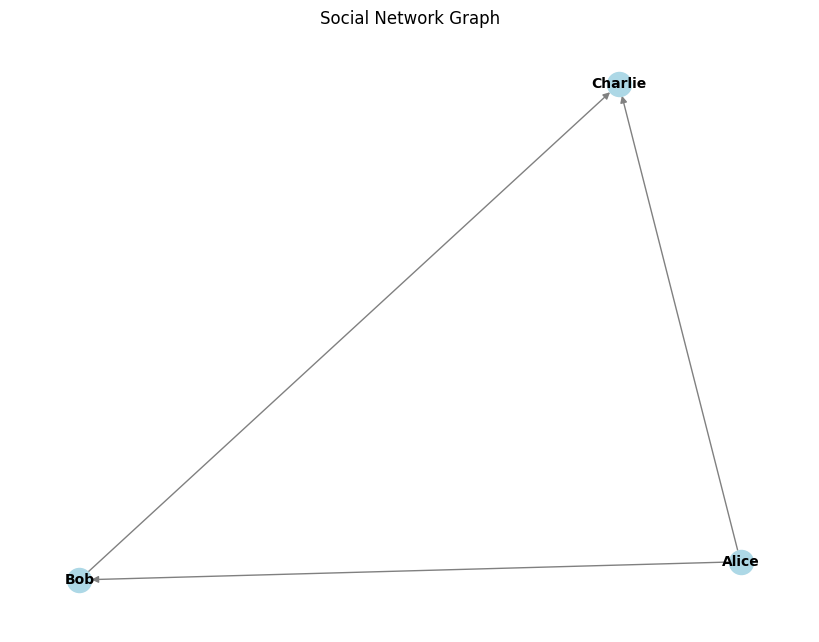

In [2]:
# Create a directed graph for social connections
G = nx.DiGraph()
G.add_edges_from([("Alice", "Bob"), ("Bob", "Charlie"), ("Alice", "Charlie")])

# Plotting the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Social Network Graph")
plt.show()


## Example 2

Calculates the degree, in-degree, and out-degree of nodes in a directed graph to determine the "popularity" of nodes in a social network.

Degree: {'Alice': 2, 'Bob': 2, 'Charlie': 2}
In-Degree: {'Alice': 0, 'Bob': 1, 'Charlie': 2}
Out-Degree: {'Alice': 2, 'Bob': 1, 'Charlie': 0}


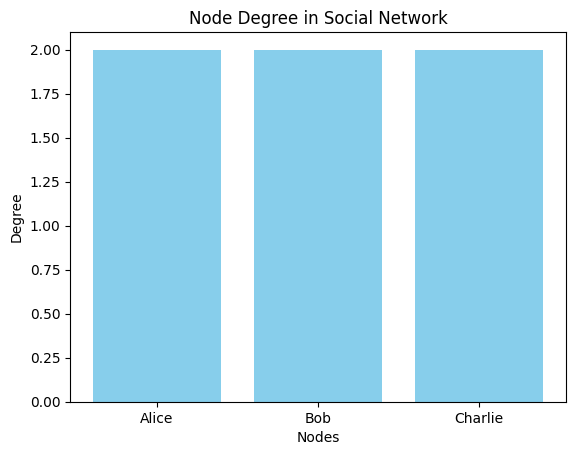

In [3]:
# Degree of each node
degree = dict(G.degree())
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

print("Degree:", degree)
print("In-Degree:", in_degree)
print("Out-Degree:", out_degree)

# Visualizing node centrality
plt.bar(degree.keys(), degree.values(), color='skyblue')
plt.title("Node Degree in Social Network")
plt.xlabel("Nodes")
plt.ylabel("Degree")
plt.show()


## Example 3

Finds the shortest path between nodes in a graph, which could represent the shortest connection path in a social network.

Shortest path from Alice to Charlie: ['Alice', 'Charlie']


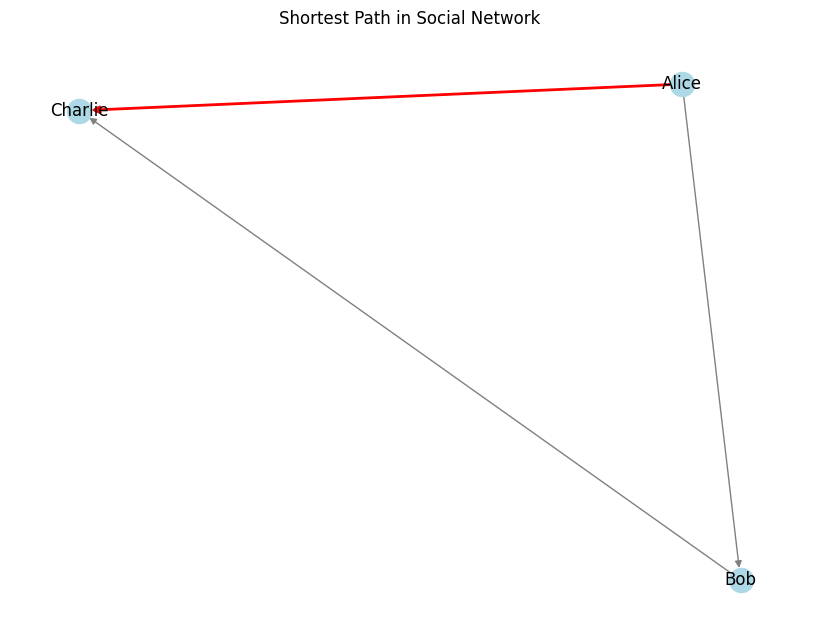

In [4]:
# Calculate shortest path between Alice and Charlie
shortest_path = nx.shortest_path(G, source="Alice", target="Charlie")
print("Shortest path from Alice to Charlie:", shortest_path)

# Visualization
path_edges = list(zip(shortest_path, shortest_path[1:]))
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray")
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
plt.title("Shortest Path in Social Network")
plt.show()


## Example 4

Calculate the Laplacian matrix for an undirected graph and use it to analyze the graph structure.

In [5]:
# Create a sample undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)])

# Compute the adjacency matrix and Laplacian matrix
adj_matrix = nx.adjacency_matrix(G).todense()
laplacian_matrix = nx.laplacian_matrix(G).todense()

# Print matrices
print("Adjacency Matrix:")
print(adj_matrix)
print("\nLaplacian Matrix:")
print(laplacian_matrix)


Adjacency Matrix:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]

Laplacian Matrix:
[[ 2 -1 -1  0]
 [-1  2 -1  0]
 [-1 -1  3 -1]
 [ 0  0 -1  1]]


## Example 5

Compute eigenvalues of the Laplacian matrix to analyze graph connectivity and identify clusters.

Eigenvalues of the Laplacian Matrix: [-1.77528614e-16  1.00000000e+00  3.00000000e+00  4.00000000e+00]


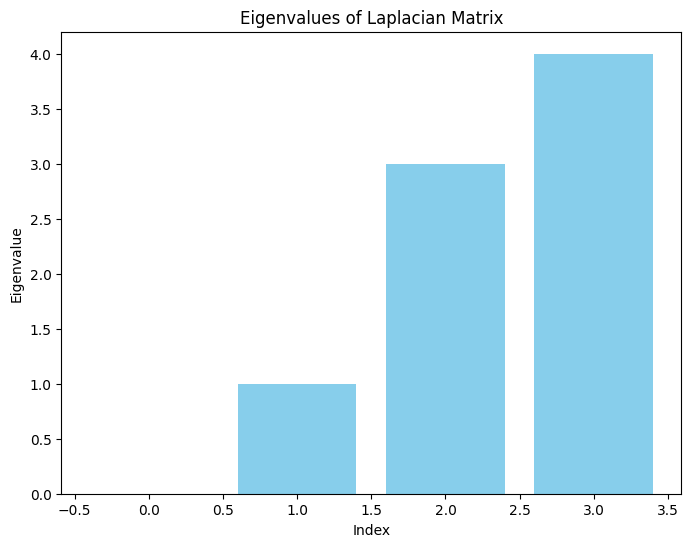

In [6]:
# Compute eigenvalues of the Laplacian matrix
eigenvalues = eigvalsh(laplacian_matrix)

# Print eigenvalues
print("Eigenvalues of the Laplacian Matrix:", eigenvalues)

# Visualize eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(len(eigenvalues)), eigenvalues, color="skyblue")
plt.title("Eigenvalues of Laplacian Matrix")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.show()


# **4.2. Graph and graph modeling**

Chapter 4.2 focuses on the spectral graph bipartitioning technique, which aims to divide a graph into two balanced subsets (partitions) while minimizing the number of edges between the subsets. This approach leverages the mathematical properties of the Laplacian matrix of a graph.  This section builds on graph theory and linear algebra to provide a robust method for graph partitioning, emphasizing the use of spectral properties for optimization.

Two examples demonstrate some key concepts discussed in the course material.

## Example 1

Demonstrates partitioning of a graph by computing the Laplacian matrix and using eigenvalues for community detection.

Fiedler Vector: [-7.07106781e-01  5.49532361e-16  7.85046229e-17  7.07106781e-01]


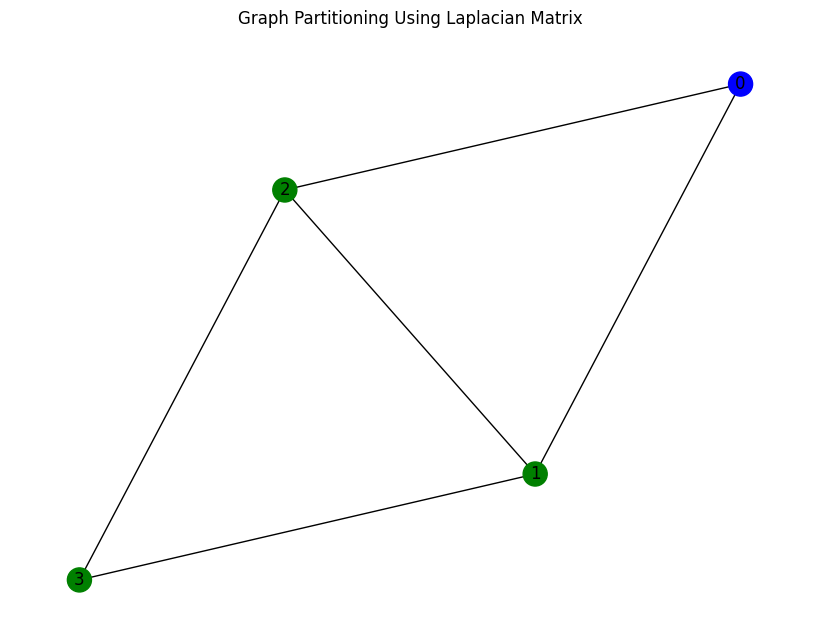

In [7]:
# Sample adjacency matrix of a graph
A = np.array([[0, 1, 1, 0],
              [1, 0, 1, 1],
              [1, 1, 0, 1],
              [0, 1, 1, 0]])

# Degree matrix
D = np.diag(A.sum(axis=1))
# Laplacian matrix
L = D - A

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = la.eigh(L)

# Display smallest non-zero eigenvalue and corresponding eigenvector
fiedler_vector = eigenvectors[:, 1]
print("Fiedler Vector:", fiedler_vector)

# Plot the graph with partitioned nodes highlighted
plt.figure(figsize=(8, 6))
G = nx.Graph(A)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['blue' if x < 0 else 'green' for x in fiedler_vector])
plt.title("Graph Partitioning Using Laplacian Matrix")
plt.show()


## Example 2

Demonstrates graph partitioning by calculating the Fiedler vector from the Laplacian matrix of the graph. Nodes are assigned to partitions based on the sign of the values in the Fiedler vector.

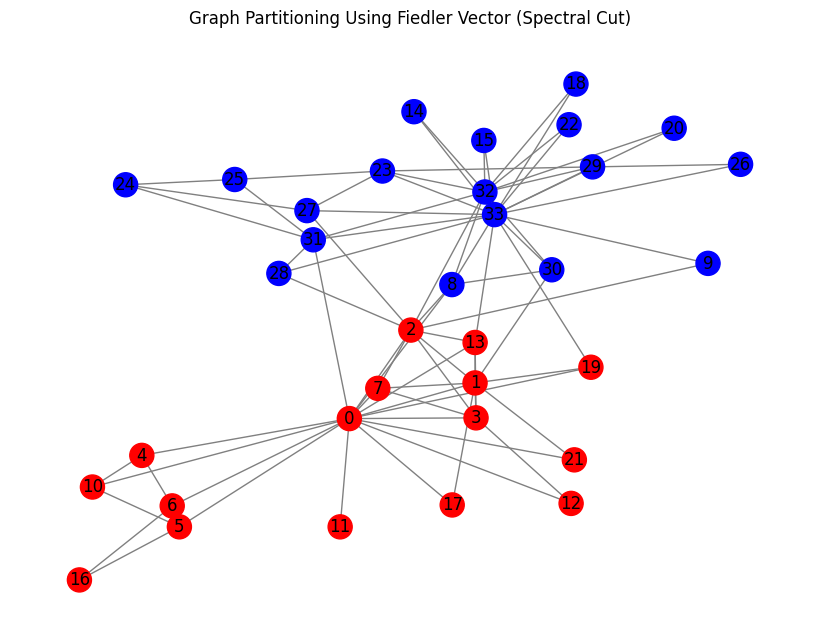

In [8]:
# Create a sample graph (Zachary's Karate Club graph)
G = nx.karate_club_graph()

# Compute the Laplacian matrix of the graph
L = nx.laplacian_matrix(G).astype(float)

# Calculate the Fiedler vector (second smallest eigenvector of the Laplacian)
# The smallest eigenvalue is ignored, as it corresponds to the trivial solution
eigenvalues, eigenvectors = eigsh(L, k=2, which='SM')
fiedler_vector = eigenvectors[:, 1]

# Partition the graph based on the sign of the Fiedler vector values
partition_1 = [node for idx, node in enumerate(G.nodes) if fiedler_vector[idx] < 0]
partition_2 = [node for idx, node in enumerate(G.nodes) if fiedler_vector[idx] >= 0]

# Assign colors to partitions for visualization
colors = ['red' if node in partition_1 else 'blue' for node in G.nodes]

# Plot the graph with nodes colored by partition
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color="gray")
plt.title("Graph Partitioning Using Fiedler Vector (Spectral Cut)")
plt.show()
